In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

font = {'size'   : 15}

plt.rc('font', **font)

# read the csv file and put it into a dataframe
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url)
df[32233:32239]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
32233,BLZ,North America,Belize,2022-09-20,68704.0,0.0,33.000,680.0,0.0,0.000,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
32234,BLZ,North America,Belize,2022-09-21,68704.0,0.0,33.000,680.0,0.0,0.000,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
32235,BLZ,North America,Belize,2022-09-22,68743.0,39.0,18.714,683.0,3.0,0.429,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
32236,BLZ,North America,Belize,2022-09-23,68743.0,0.0,18.714,683.0,0.0,0.429,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
32237,BLZ,North America,Belize,2022-09-24,68743.0,0.0,18.714,683.0,0.0,0.429,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
32238,BLZ,North America,Belize,2022-09-25,68784.0,41.0,11.429,683.0,0.0,0.429,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN


In [2]:
# shape of the dataframe

df.shape

(358646, 67)

In [3]:
# data types of the columns

df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [4]:
# columns in the dataframe

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# data description

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.206280e+05,3.490320e+05,3.477730e+05,2.990860e+05,349089.000000,347859.000000,320628.000000,349032.000000,347773.000000,299086.000000,...,205904.000000,136322.000000,245664.000000,330057.000000,269693.000000,3.586460e+05,1.221100e+04,12211.000000,12211.000000,12211.000000
mean,6.862419e+06,9.375506e+03,9.409256e+03,8.695437e+04,83.515536,83.807025,104442.411650,141.892453,142.397917,883.471201,...,32.909734,50.789387,3.097013,73.710366,0.722408,1.282212e+08,5.312168e+04,9.760347,11.337701,1675.398350
std,4.155251e+07,1.089256e+05,9.331850e+04,4.439683e+05,629.077727,554.982392,153566.194211,1149.763610,592.949571,1108.197725,...,13.574662,31.957291,2.548374,7.394886,0.148963,6.599107e+08,1.494480e+05,12.293895,25.166908,1941.471481
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,8.355000e+03,0.000000e+00,1.430000e-01,1.290000e+02,0.000000,0.000000,2692.589250,0.000000,0.025000,61.639250,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.216500e+02,1.430000,-1.590000,73.764453
50%,7.271900e+04,1.000000e+00,2.285700e+01,1.349000e+03,0.000000,0.143000,29666.037500,0.061000,5.948000,388.263500,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.968999e+03,8.100000,5.720000,1115.956200
75%,7.844830e+05,2.440000e+02,4.737140e+02,1.201900e+04,2.000000,4.857000,138728.976000,32.893000,78.600000,1382.952000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.770731e+04,15.380000,16.300000,2746.703700
max,7.721658e+08,8.401963e+06,6.402036e+06,6.981250e+06,57889.000000,14822.000000,746007.717000,228872.025000,37241.781000,6511.885000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.620000,377.630000,10292.916000


In [6]:
# check for missing values

df.isnull().sum()

iso_code                                        0
continent                                   17040
location                                        0
date                                            0
total_cases                                 38018
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346435
excess_mortality_cumulative                346435
excess_mortality                           346435
excess_mortality_cumulative_per_million    346435
Length: 67, dtype: int64

# Visualisations

### Line chart: Comparison of Total COVID Cases (log scale) over Time between Sri Lanka and France

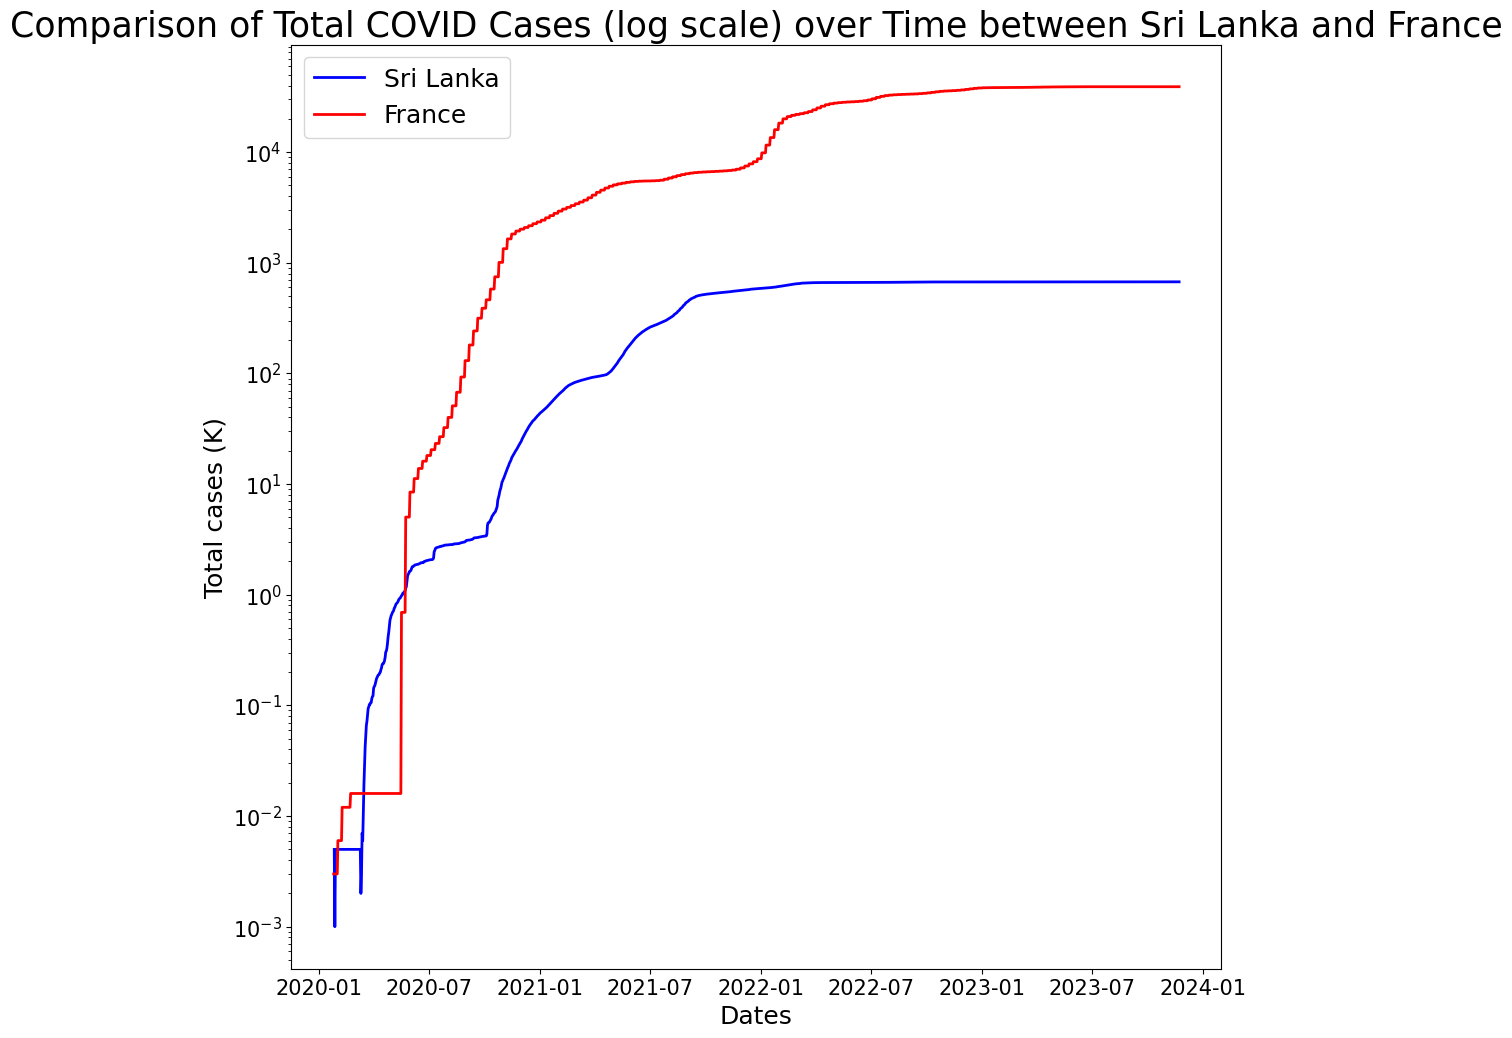

In [7]:
df.groupby('location', sort=True)['date']
df_LK = df[df['location'] == 'Sri Lanka']
df_LK.loc[:,'date'] = pd.to_datetime(df_LK.loc[:,'date'], format='%Y-%m-%d')
df_FR = df[df['location'] == 'France']
df_FR.loc[:,'date'] = pd.to_datetime(df_FR.loc[:,'date'], format='%Y-%m-%d')

values_LK=df_LK['total_cases']
dates_LK=df_LK['date']
values_FR=df_FR['total_cases']
dates_FR=df_FR['date']


# use the plot function
plt.figure(figsize=(12,12))
plt.plot(dates_LK,values_LK/1000,linewidth=2,linestyle='solid',color='blue')
plt.yscale("log")
plt.plot(dates_FR,values_FR/1000,linewidth=2,linestyle='solid',color='red')
plt.legend(['Sri Lanka','France'],fontsize=18)
plt.title('Comparison of Total COVID Cases (log scale) over Time between Sri Lanka and France',fontsize=25) 
plt.xlabel('Dates',fontsize=18)
plt.ylabel('Total cases (K)',fontsize=18)
plt.show()

The Line chart shows the progression of COVID-19 cases over time for Sri Lanka and France.<br>
I chose the Line Chart as it is the best to show data over time.<br>
The slope of a log-scaled graph measures the relative change in the variable of interest.$^{2}$<br>
This shows the cumulative total number of COVID cases detected over time

### Bar chart: COVID-19 Cases and Fatalities in Sri Lanka over time (Seven-Day Smoothed Trends)

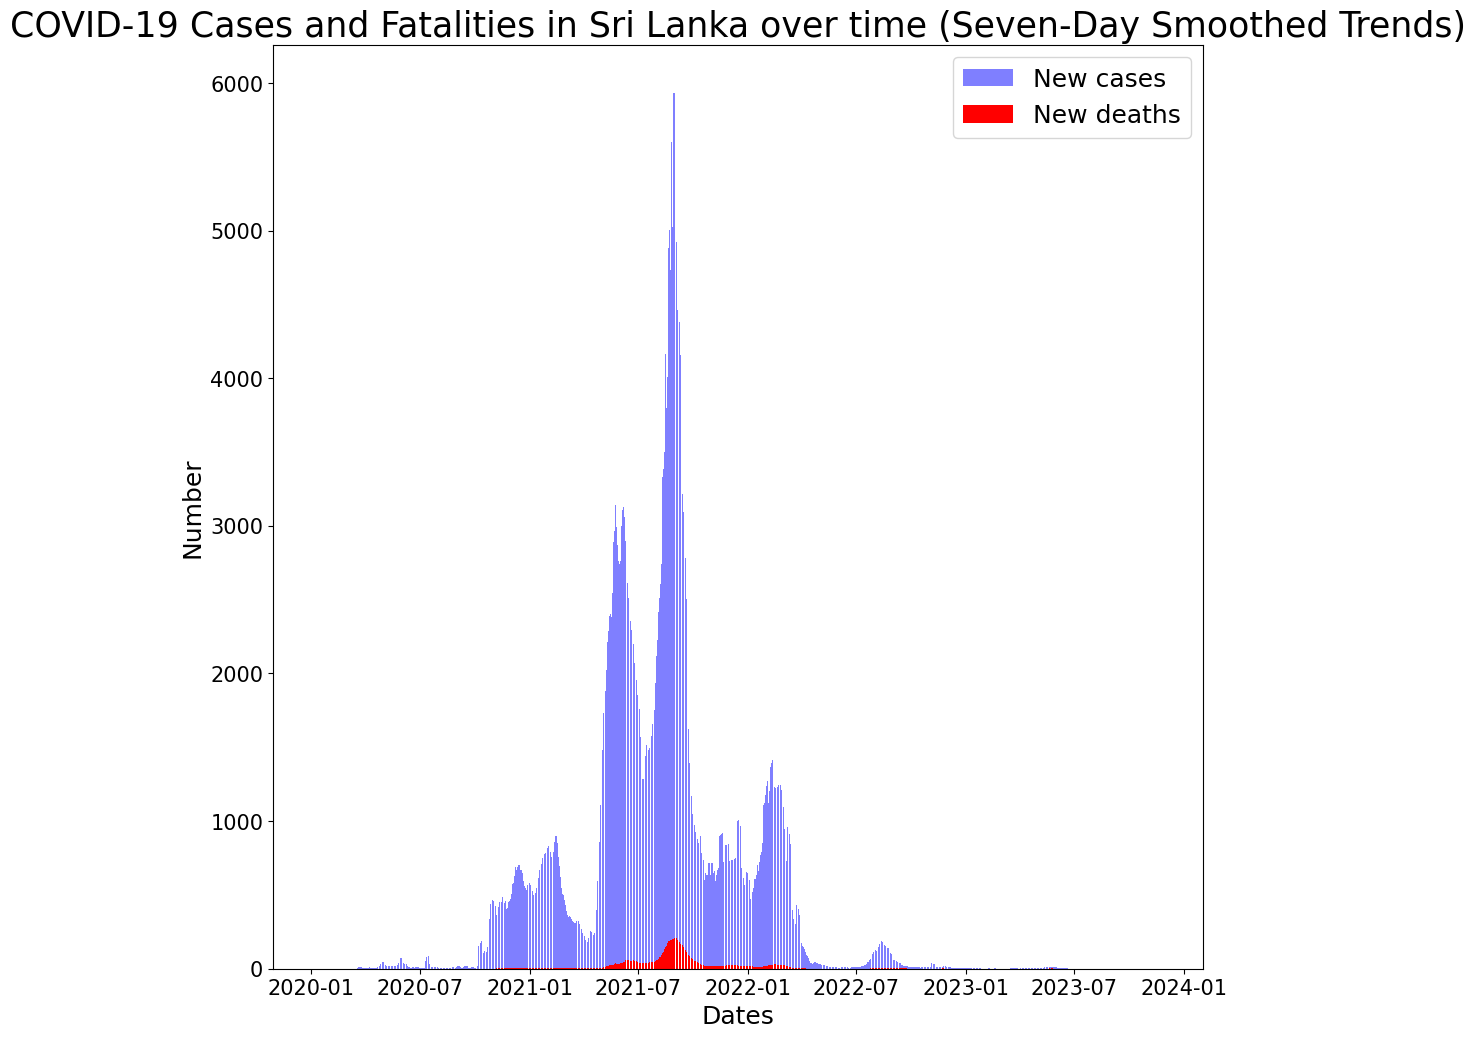

In [8]:
lk_n_c_s = df_LK['new_cases_smoothed']
lk_d_s = df_LK['new_deaths_smoothed']

plt.figure(figsize=(12,12))
plt.bar(dates_LK,lk_n_c_s,linewidth=2,linestyle='solid',color='blue', alpha=0.5)
plt.bar(dates_LK,lk_d_s,linewidth=2,linestyle='solid',color='red')
plt.legend(['New cases','New deaths'],fontsize=18)
plt.title('COVID-19 Cases and Fatalities in Sri Lanka over time (Seven-Day Smoothed Trends)',fontsize=25)
plt.xlabel('Dates',fontsize=18)
plt.ylabel('Number',fontsize=18)
plt.show()


Bar chart shows the number of cases detected per day (7 day smoothed $^{1}$) over time in Sri Lanka in Blue<br>
and the number of deaths detected per day (7 day smoothed $^{1}$) over time in Sri Lanka due to COVID-19 is shown in red.<br>
I chose the bar chart to show the discrete data.<br>
It shows that as the number of cases increased the health care system got overwhelmed with the number of patients and the number of deaths increased as a consequence of this.

### Heat Map: Interrelationships among Key Variables in COVID-19 Data

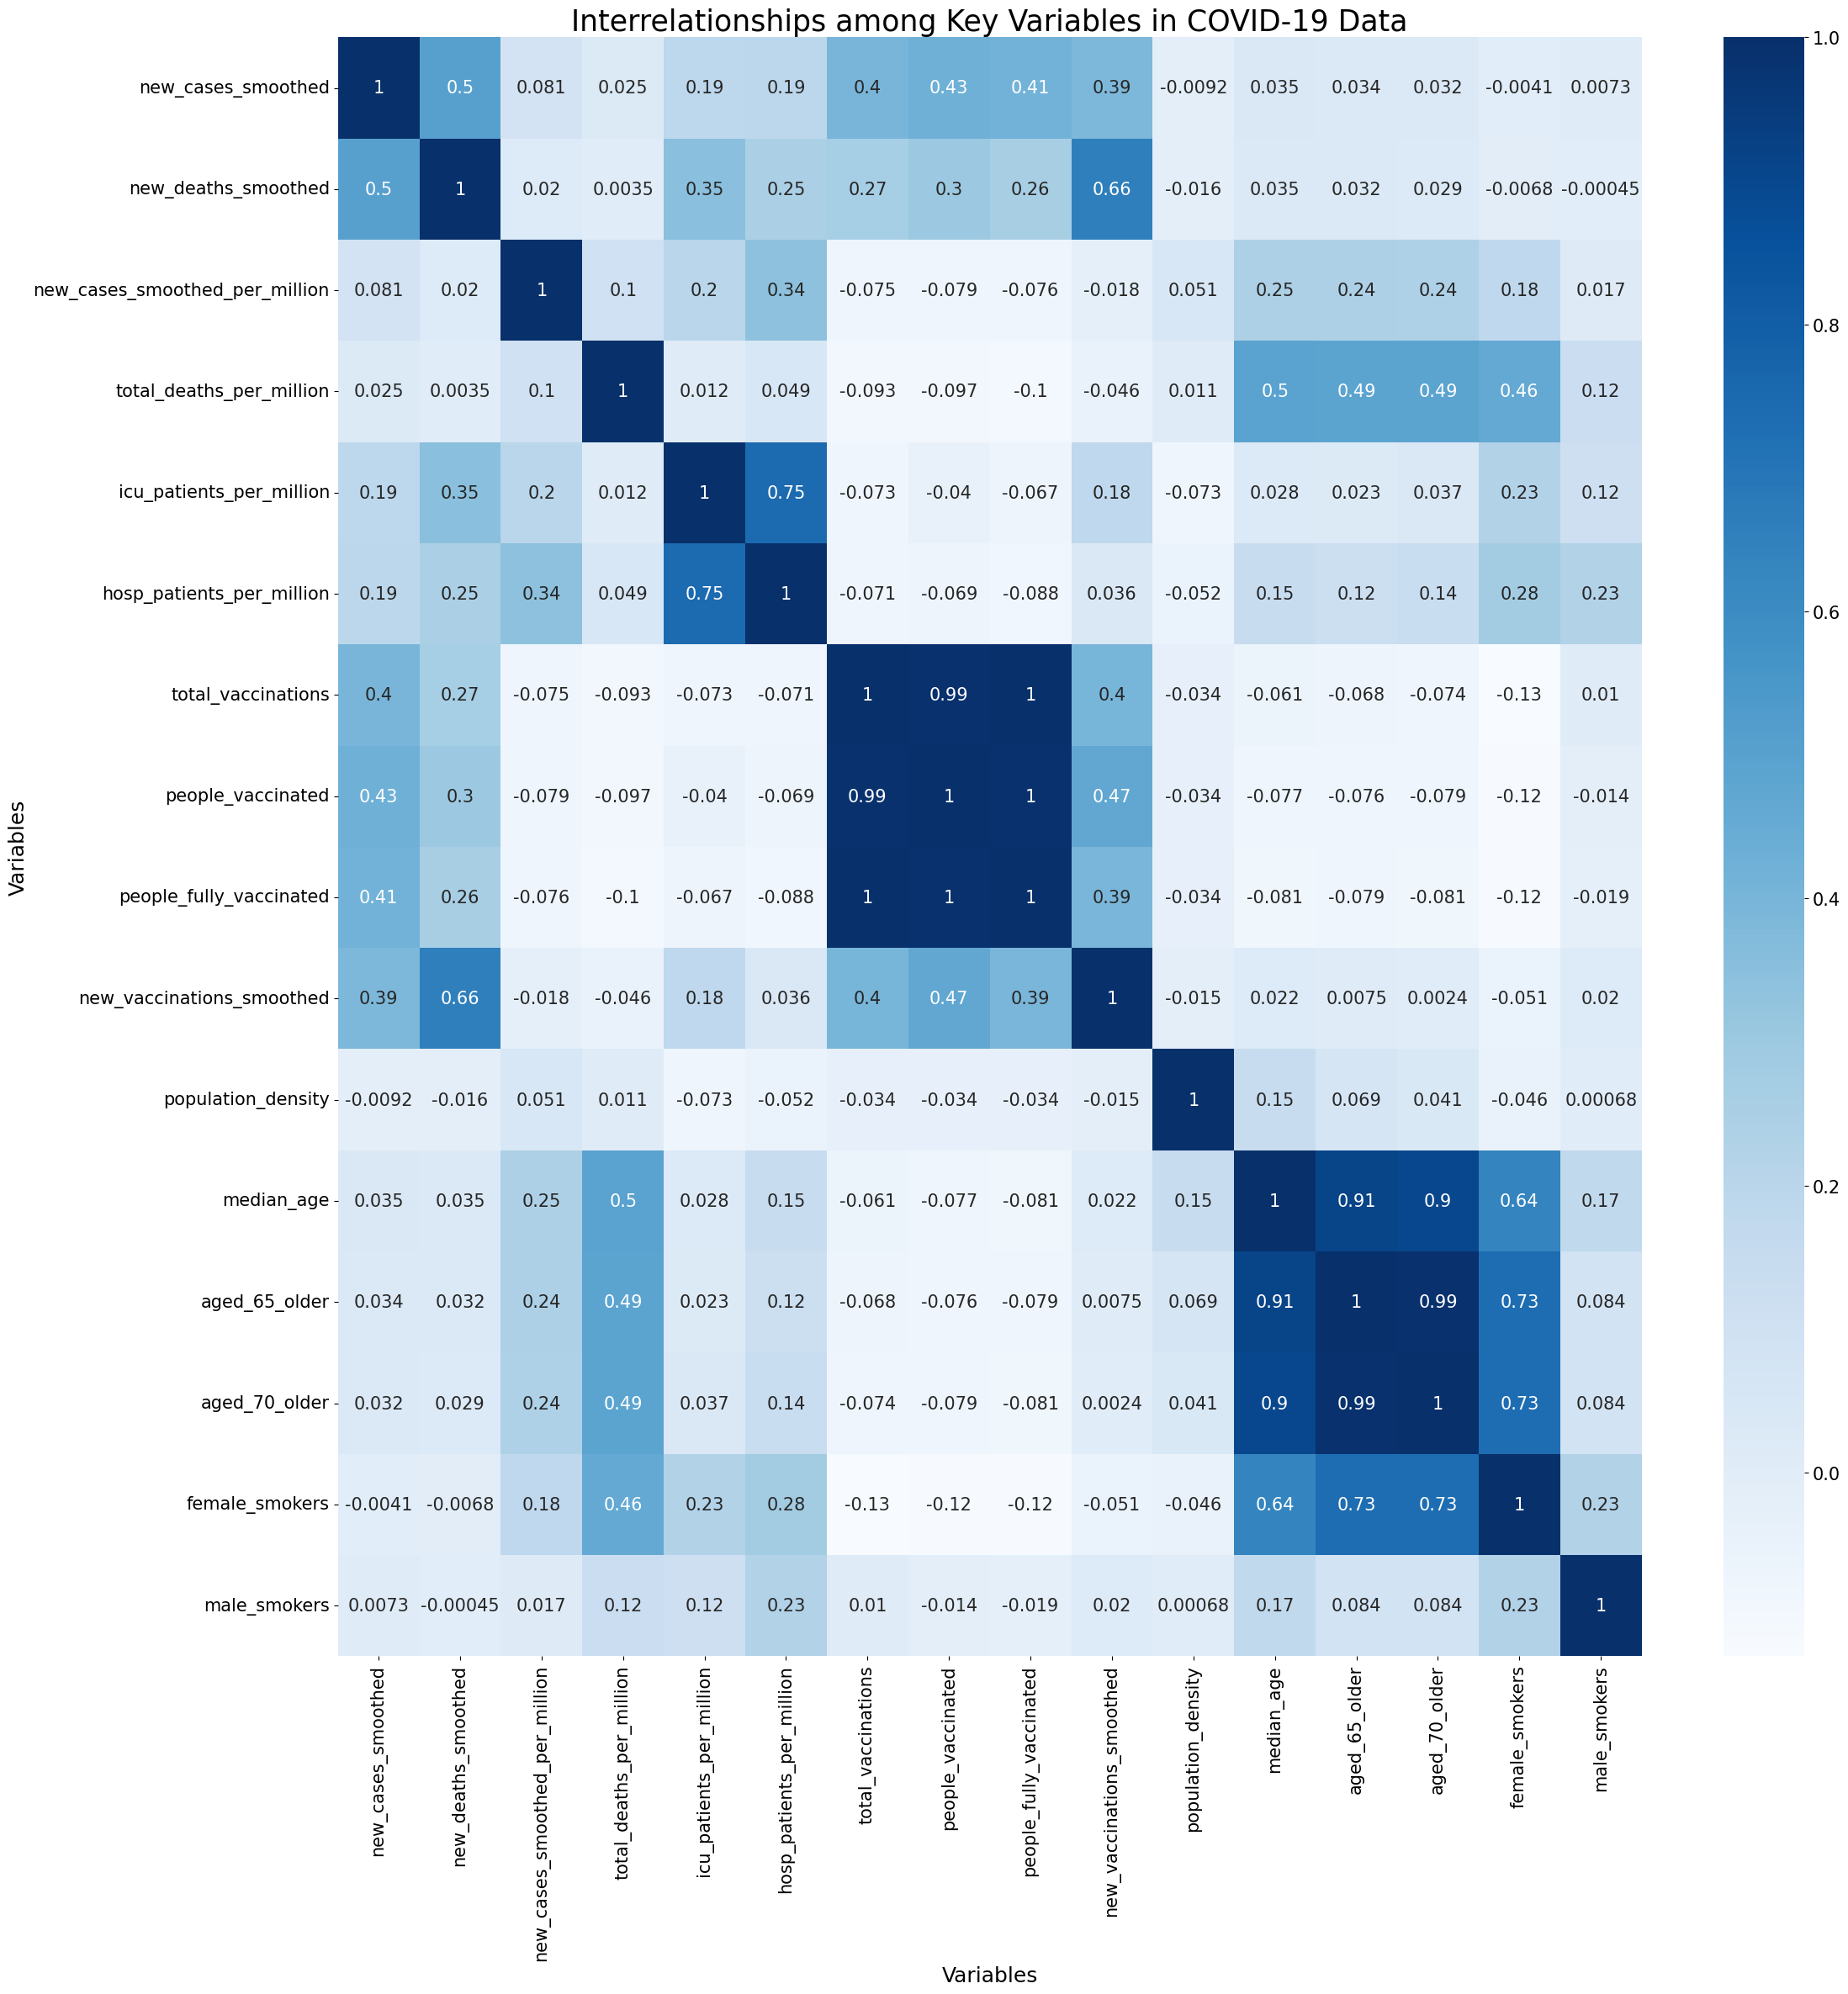

In [9]:
df_dropped_correlation = df[[
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'new_cases_smoothed_per_million',
    'total_deaths_per_million',
    'icu_patients_per_million',
    'hosp_patients_per_million',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'new_vaccinations_smoothed',
    'population_density',
    'median_age',
    'aged_65_older',
    'aged_70_older',
    'female_smokers',
    'male_smokers'
    ]].corr()
plt.figure(figsize=(25,25))
sns.heatmap(df_dropped_correlation,annot=True, cmap='Blues')
plt.title('Interrelationships among Key Variables in COVID-19 Data',fontsize=25)
plt.xlabel('Variables',fontsize=18)
plt.ylabel('Variables',fontsize=18)
plt.show()

This shows the correlation of varibles in the x & y axis. The higher the number in the box (max 1) there is a higher correlation of the relevent factors, which is also shown in a lighter colour and the lower the number the lower the relation ship between the relevent variable in the x and y axis of the box.<br>
It is used to find factors in the data that might have a correlation.<br>
This shows that there *is relation between the number of over 65 and 75 female covid patients and smoking (0.73)* and that there *is relation between the number of new vaccinations smoothed and new dealths smoothed (0.66)*


### Box plot: Cariation in Median Age in each continant

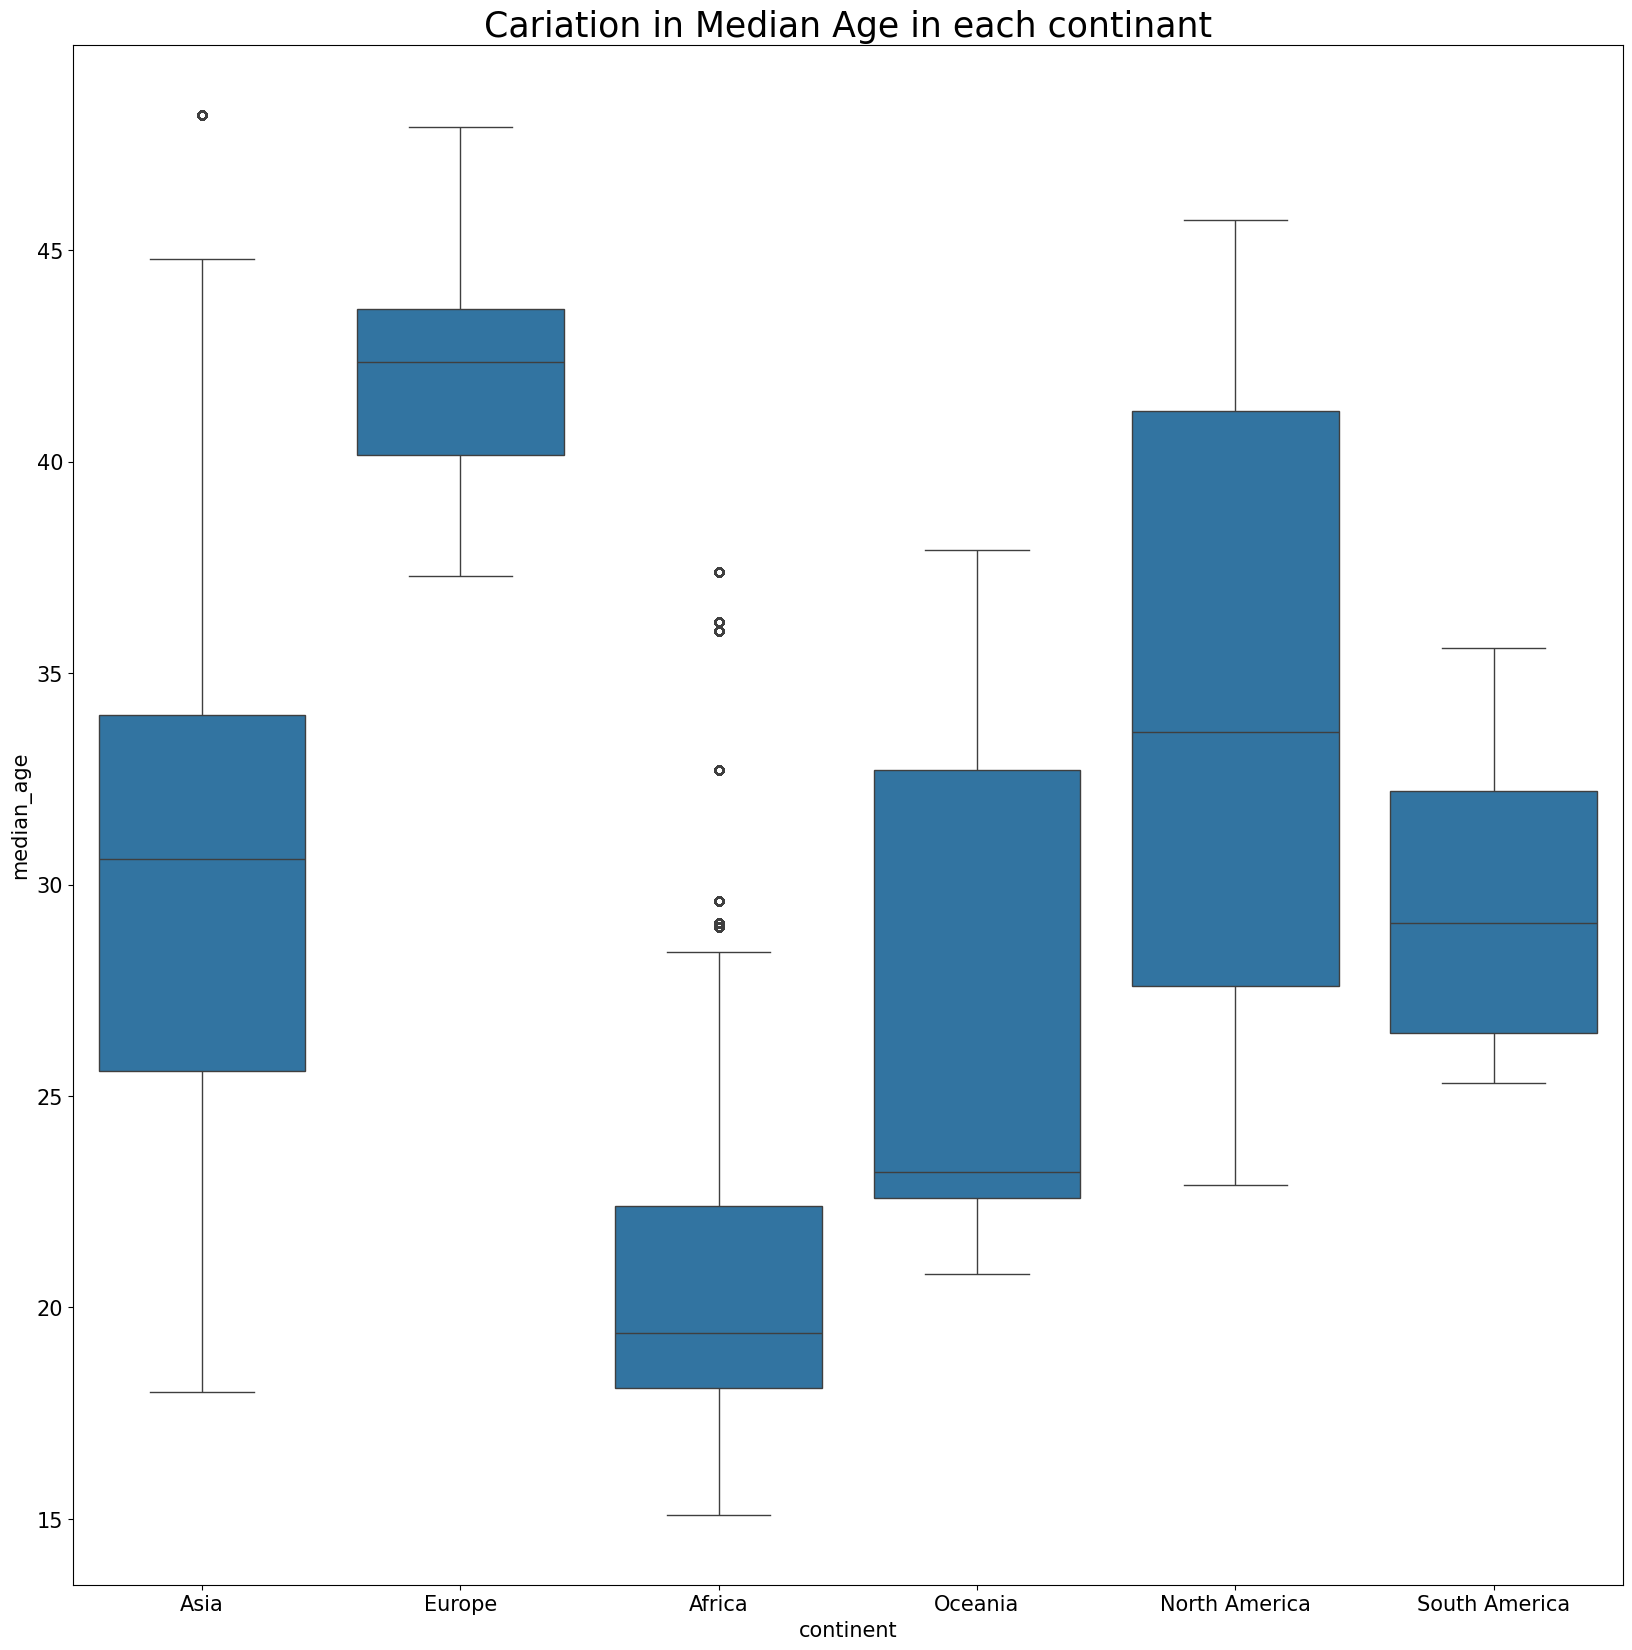

In [10]:
a = sns.boxplot(x=df["continent"], y=df["median_age"])
a.figure.set_size_inches(20, 20)
plt.title('Cariation in Median Age in each continant',fontsize=25)
plt.show(a)

This box plot shows the distribution of the median age of countries in a continent.<br>
It shows that Europe has a elderly population and this can cause covid to cause death in more people.<br>
It shows the mean of the median age for the countries in the continent. 25th and 75th percentile, 1 SD above and below and any outliers.

### Pie chart: Number of Death per Population in France and Sri Lanka

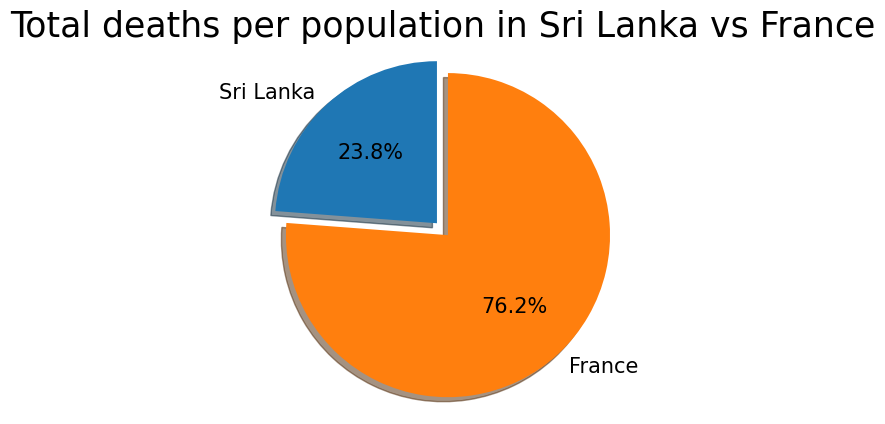

In [11]:
df_FR = df[df['location'] == 'France']
df_FR_pop = df_FR['population'].values[0].astype(int)
df_LK_pop = df_LK['population'].values[0].astype(int)
total_deaths_FR = df_FR['new_deaths_smoothed'].sum() # Float as this is a smoothed value
total_deaths_LK = df_LK['new_deaths_smoothed'].sum() # Float as this is a smoothed value

sl_d_p_p = total_deaths_LK/df_LK_pop
in_d_p_p = total_deaths_FR/df_FR_pop

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Sri Lanka', 'France'
sizes = [sl_d_p_p, in_d_p_p]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total deaths per population in Sri Lanka vs France',fontsize=25)
plt.show()

The Pie chart shows the deaths per population of two countries.<br>
I chose a pie chart to visualize this as it was compairing two countries.<br>
It shows the effect of COVID death for a country.

In [12]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

df_con = df.rename(columns={'location':'country'})
df_con.replace({'iso_code':{'USA':'USA'}},inplace=True)
df_con.replace({'iso_code':{'ARG':'ARG'}},inplace=True)
df_con.replace({'iso_code':{'IND':'IND'}},inplace=True)
df_con.replace({'iso_code':{'ITA':'ITA'}},inplace=True)

m = folium.Map(location=[0, 0], zoom_start=2.5)

folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth COVID-19',
    data=df_con,
    columns=['iso_code', 'total_deaths_per_million'],
    key_on='feature.id',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='COVID-19 Deaths per Million'
).add_to(m)

folium.LayerControl().add_to(m)

m

The map shows the number of COVID deaths per million population on the global scale. <br>
This allows us to visualize the effect of COVID on different countries.<br>
If a country has a low population, even a small number of deaths causes the country to be shown in darker colour.

### Comparison of Total COVID Cases (log scale) over Time between two countries

### Input 2 countries

_* uncomment to work_

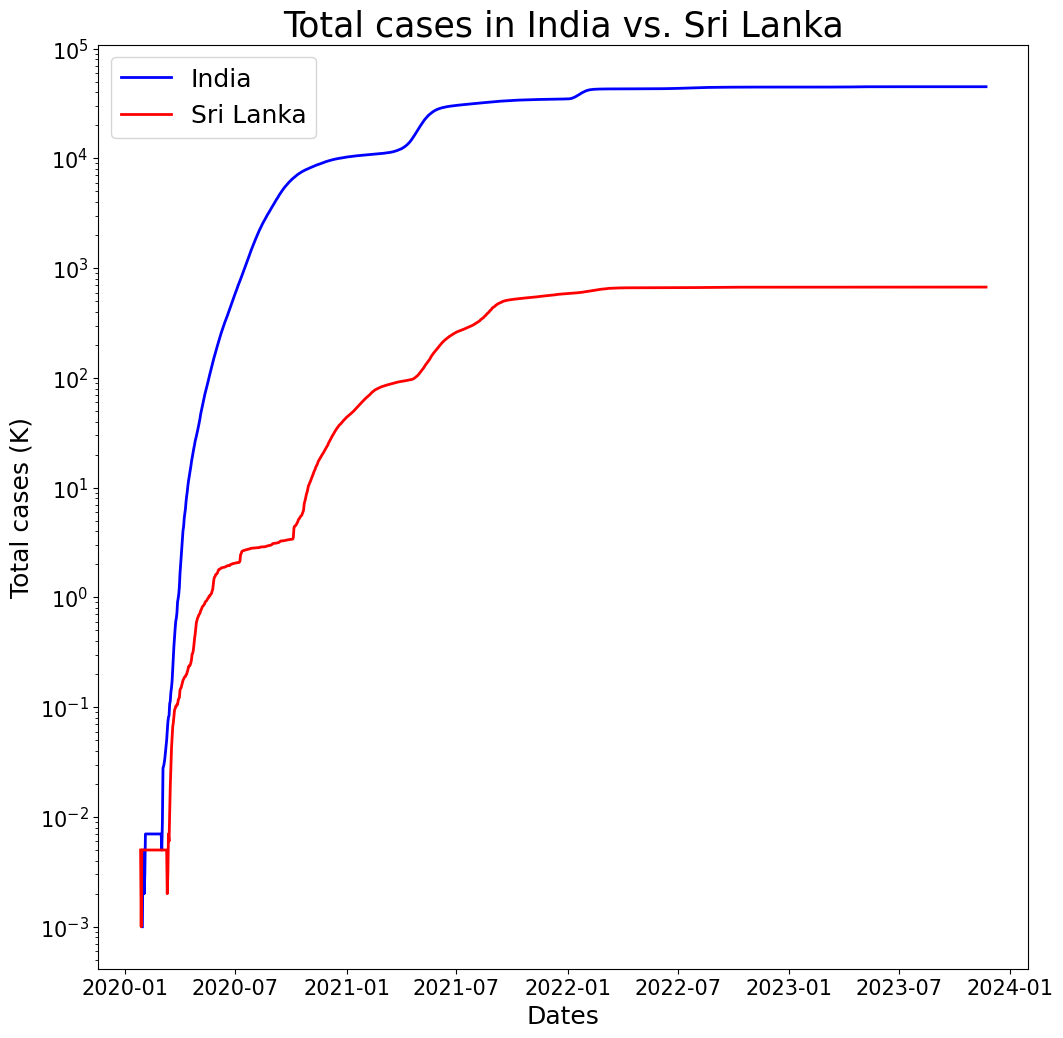

In [13]:
def plot_country(country1,country2):
    df_country1 = df[df['location'] == country1]
    df_country1.loc[:,'date'] = pd.to_datetime(df_country1.loc[:,'date'], format='%Y-%m-%d')
    values1=df_country1['total_cases']
    dates1=df_country1['date']

    df_country2 = df[df['location'] == country2]
    df_country2.loc[:,'date'] = pd.to_datetime(df_country2.loc[:,'date'], format='%Y-%m-%d')
    values2=df_country2['total_cases']
    dates2=df_country2['date']

    plt.figure(figsize=(12,12))
    plt.plot(dates1,values1/1000,linewidth=2,linestyle='solid',color='blue')
    plt.plot(dates2,values2/1000,linewidth=2,linestyle='solid',color='red')
    plt.yscale("log")
    plt.legend([country1,country2],fontsize=18)
    plt.title('Total cases in '+country1+ ' vs. '+country2,fontsize=25)
    plt.xlabel('Dates',fontsize=18)
    plt.ylabel('Total cases (K)',fontsize=18)
    return plt.show()

input_country1 = input('Enter the first country: ')
input_country2 = input('Enter the second country: ')
plot_country(input_country1,input_country2)

#### References :

1. [5 Wrong Ways to Do Covid-19 Data Smoothing](https://towardsdatascience.com/five-wrong-ways-to-do-covid-19-data-smoothing-1538db6ff182)
2. [Logarithmic versus Linear Visualizations of COVID-19 Cases Do Not Affect Citizens’ Support for Confinement](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7200843/)
